<a href="https://colab.research.google.com/github/DiploDatos/AnalisisYCuracion/blob/master/Entregable_Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2021*

----

# Trabajo práctico entregable - parte 2


En el ejercicio 1 de la parte 1 del entregable seleccionaron las filas y columnas relevantes al problema de predicción de precios de una propiedad. Además de ello, tuvieron que reducir el número de valores posibles para las variables categóricas utilizando información de dominio.

En el ejercicio 2 de la parte 1 del entregable imputaron los valores faltantes de las columnas `Suburb` y las columnas obtenidas a partir del conjunto de datos `airbnb`.

En esta notebook, **se utilizará resultado de dichas operaciones.**


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_context('talk')

In [3]:
# Acá deberían leer el conjunto de datos que ya tienen.
melb_df = pd.read_csv('https://github.com/sase1988/EyCD/raw/main/melb_df_clean.csv')
melb_df.drop(['Unnamed: 0', 'index'], axis=1, inplace=True)
melb_df[:3]

,Suburb,Rooms,Type,Price,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Propertycount,distance_group,Date_Month,airbnb_price_mean
0,Abbotsford,2,h,1480000.0,2.5,3067.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,4019.0,"(0, 10]",2016-03-01,130.624031
1,Abbotsford,2,h,1035000.0,2.5,3067.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,4019.0,"(0, 10]",2016-04-01,130.624031
2,Abbotsford,3,h,1465000.0,2.5,3067.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,4019.0,"(0, 10]",2017-04-01,130.624031


Eliminamos la variable distance_group

In [4]:
melb_df = melb_df.drop(['distance_group'],axis = 1)

## Ejercicio 1: Encoding

1. Seleccionar todas las filas y columnas del conjunto de datos obtenido en la parte 1 del entregable, **excepto** `BuildingArea` y `YearBuilt`, que volveremos a imputar más adelante.

2. Aplicar una codificación One-hot encoding a cada fila, tanto para variables numéricas como categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.

Algunas opciones:
  1. Utilizar `OneHotEncoder` junto con el parámetro `categories` para las variables categóricas y luego usar `numpy.hstack` para concatenar el resultado con las variables numéricas. 
  2. `DictVectorizer` con algunos pasos de pre-proceso previo.

Recordar también que el atributo `pandas.DataFrame.values` permite acceder a la matriz de numpy subyacente a un DataFrame.


### Dictvectorizer

Decidimos trabajar directamente con DictVectorizer para que codifique solamente las categóricas y conserve las numéricas como están.

In [87]:
feature_dict = list(melb_df.T.to_dict().values())

In [88]:
feature_dict[1]

{'Bathroom': 1.0,
 'BuildingArea': 79.0,
 'Car': 0.0,
 'CouncilArea': 'Yarra',
 'Date_Month': '2016-04-01',
 'Distance': 2.5,
 'Landsize': 156.0,
 'Lattitude': -37.8079,
 'Longtitude': 144.9934,
 'Postcode': 3067.0,
 'Price': 1035000.0,
 'Propertycount': 4019.0,
 'Rooms': 2,
 'Suburb': 'Abbotsford',
 'Type': 'h',
 'YearBuilt': 1900.0,
 'airbnb_price_mean': 130.62403100775194}

In [89]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False)
feature_matrix = vec.fit_transform(feature_dict)

In [90]:
feature_matrix.shape

(13535, 378)

## Ejercicio 2: Imputación por KNN

En el teórico se presentó el método `IterativeImputer` para imputar valores faltantes en variables numéricas. Sin embargo, los ejemplos presentados sólo utilizaban algunas variables numéricas presentes en el conjunto de datos. En este ejercicio, utilizaremos la matriz de datos codificada para imputar datos faltantes de manera más precisa.

1. Agregue a la matriz obtenida en el punto anterior las columnas `YearBuilt` y `BuildingArea`.
2. Aplique una instancia de `IterativeImputer` con un estimador `KNeighborsRegressor` para imputar los valores de las variables. ¿Es necesario estandarizar o escalar los datos previamente?
3. Realice un gráfico mostrando la distribución de cada variable antes de ser imputada, y con ambos métodos de imputación.

### Imputando solo con las variables YearBuilt y BuildingArea

In [91]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer

melb_data_mice = melb_df.copy(deep=True)

mice_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
melb_data_mice[['YearBuilt','BuildingArea']] = mice_imputer.fit_transform(
    melb_data_mice[['YearBuilt', 'BuildingArea']])

Ejemplo de gráfico comparando las distribuciones de datos obtenidas con cada método de imputación.

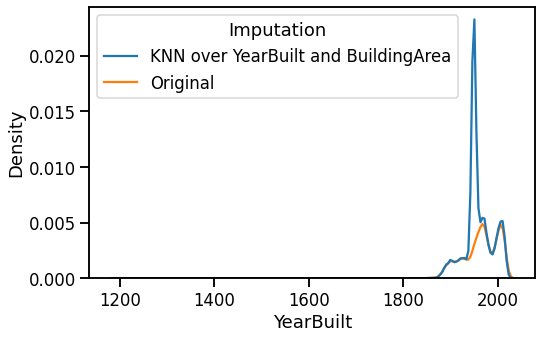

In [92]:
mice_year_built = melb_data_mice.YearBuilt.to_frame()
mice_year_built['Imputation'] = 'KNN over YearBuilt and BuildingArea'
melb_year_build = melb_df.YearBuilt.dropna().to_frame()
melb_year_build['Imputation'] = 'Original'
data = pd.concat([mice_year_built, melb_year_build])
fig = plt.figure(figsize=(8, 5))
g = sns.kdeplot(data=data, x='YearBuilt', hue='Imputation')

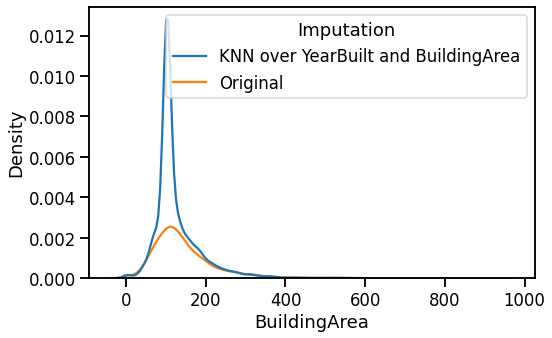

In [93]:
mice_bulding = melb_data_mice.BuildingArea.to_frame()
mice_bulding['Imputation'] = 'KNN over YearBuilt and BuildingArea'
melb_bulding = melb_df.BuildingArea.dropna().to_frame()
melb_bulding['Imputation'] = 'Original'
data = pd.concat([mice_bulding, melb_bulding])
fig = plt.figure(figsize=(8, 5))
g = sns.kdeplot(data=data, x='BuildingArea', hue='Imputation')

Al observar la distribución de los datos imputados, observamos que tienen un pico o un máximo muy alejado de la original. Es muy distinta la distribución resultante respecto a la original luego de haber hecho la imputación con solo estas 2 variables.

### Imputando con todas las columnas

Trabajamos con la salida del dictvectorizer

Las columnas de BuldingArea e YearBuilt son la 1 y la 376

In [ ]:
feature_matrix[:,1]

array([ nan,  79., 150., ...,  nan, 157., 112.])

In [ ]:
feature_matrix[:,376]

array([  nan, 1900., 1900., ..., 1997., 1920., 1920.])

Es necesario escalar las columnas numéricas antes de imputar por KNN

In [94]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaled = scaler.fit_transform(feature_matrix)

Atención: La siguiente celda puede tomar mucho tiempo en correr!

In [ ]:
mice_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor(),n_nearest_features=5)
scaled_mice = mice_imputer.fit_transform(scaled)


/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


In [ ]:
np.where(np.isnan(scaled_mice[:,1]))

(array([], dtype=int64),)

In [ ]:
np.where(np.isnan(scaled_mice[:,376]))

(array([], dtype=int64),)

#### Paso las columnas imputadas a la escala original

In [ ]:
min = np.min(melb_df.BuildingArea)
max = np.max(melb_df.BuildingArea)

buildingArea_imp = scaled_mice[:,1]*(max - min) + min

In [ ]:
min = np.min(melb_df.YearBuilt)
max = np.max(melb_df.YearBuilt)

yearBuilt_imp = scaled_mice[:,376]*(max - min) + min

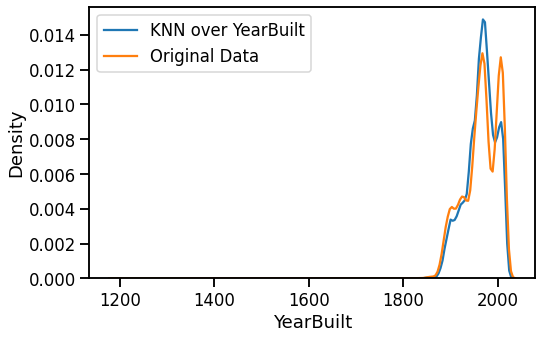

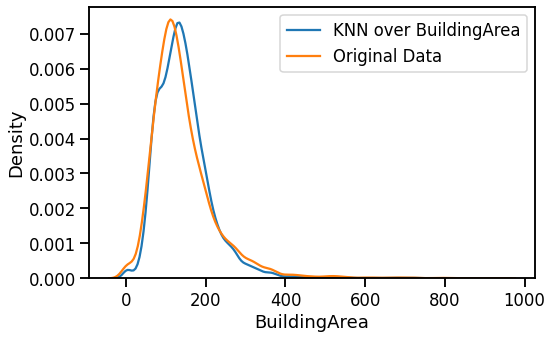

In [ ]:
fig = plt.figure(figsize=(8, 5))
sns.kdeplot(data=yearBuilt_imp,label = 'KNN over YearBuilt')
sns.kdeplot(data=melb_df.YearBuilt,label = 'Original Data')
plt.legend()
plt.show()

fig = plt.figure(figsize=(8, 5))
sns.kdeplot(data=buildingArea_imp,label = 'KNN over BuildingArea')
sns.kdeplot(data=melb_df.BuildingArea,label = 'Original Data')
plt.legend()
plt.show()

#### Y si sacáramos el suburb, cambia mucho la imputación?

In [95]:
feature_dict_2 = feature_dict.copy()

for dicc in feature_dict_2:
  del dicc['Suburb']


In [96]:
feature_dict_2[0]

{'Bathroom': 1.0,
 'BuildingArea': nan,
 'Car': 1.0,
 'CouncilArea': 'Yarra',
 'Date_Month': '2016-03-01',
 'Distance': 2.5,
 'Landsize': 202.0,
 'Lattitude': -37.7996,
 'Longtitude': 144.9984,
 'Postcode': 3067.0,
 'Price': 1480000.0,
 'Propertycount': 4019.0,
 'Rooms': 2,
 'Type': 'h',
 'YearBuilt': nan,
 'airbnb_price_mean': 130.62403100775194}

In [97]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False)
feature_matrix_2 = vec.fit_transform(feature_dict_2)

In [98]:
feature_matrix_2.shape

(13535, 71)

Las columnas de BuldingArea e YearBuilt son la 1 y la 69

In [ ]:
feature_matrix_2[:,1]

array([ nan,  79., 150., ...,  nan, 157., 112.])

In [ ]:
feature_matrix_2[:,69]

array([  nan, 1900., 1900., ..., 1997., 1920., 1920.])

In [99]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaled = scaler.fit_transform(feature_matrix_2)

In [100]:
mice_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor(),n_nearest_features=5)
scaled_mice = mice_imputer.fit_transform(scaled)


In [ ]:
np.where(np.isnan(scaled_mice[:,1]))

(array([], dtype=int64),)

In [ ]:
np.where(np.isnan(scaled_mice[:,69]))

(array([], dtype=int64),)

#### Paso las columnas imputadas a la escala original

In [101]:
min = np.min(melb_df.BuildingArea)
max = np.max(melb_df.BuildingArea)

buildingArea_imp = scaled_mice[:,1]*(max - min) + min

In [102]:
min = np.min(melb_df.YearBuilt)
max = np.max(melb_df.YearBuilt)

yearBuilt_imp = scaled_mice[:,69]*(max - min) + min

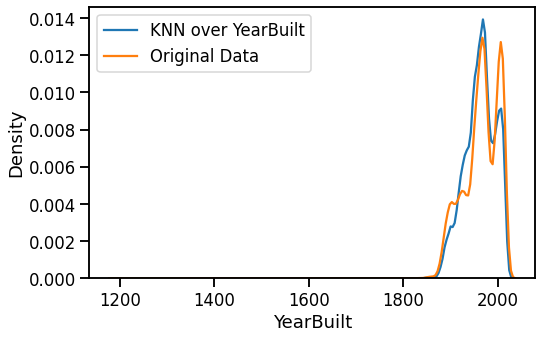

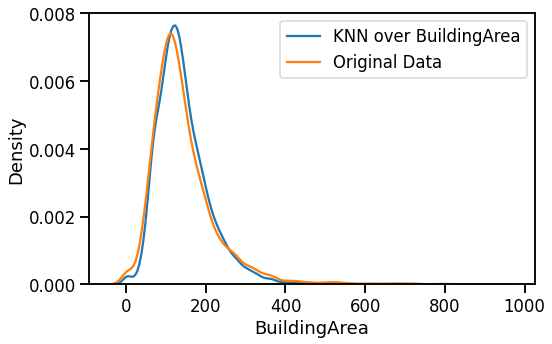

In [103]:
fig = plt.figure(figsize=(8, 5))
sns.kdeplot(data=yearBuilt_imp,label = 'KNN over YearBuilt')
sns.kdeplot(data=melb_df.YearBuilt,label = 'Original Data')
plt.legend()
plt.show()

fig = plt.figure(figsize=(8, 5))
sns.kdeplot(data=buildingArea_imp,label = 'KNN over BuildingArea')
sns.kdeplot(data=melb_df.BuildingArea,label = 'Original Data')
plt.legend()
plt.show()

Visualmente, vemos que incluso sacando la variable Suburb, el resultado no cambia mucho.

Como conclusión de esta sección, lo que observamos es que al hacer la imputación considerar todas las columnas, y no solo aquellas que queremos imputar, logra un mejor resultado. Las distribuciones de los datos imputados vs. los originales se asemejan mucho más.

## Ejercicio 3: Reducción de dimensionalidad.

Utilizando la matriz obtenida en el ejercicio anterior:
1. Aplique `PCA` para obtener $n$ componentes principales de la matriz, donde `n = min(20, X.shape[0])`. ¿Es necesario estandarizar o escalar los datos?
2. Grafique la varianza capturada por los primeros $n$ componentes principales, para cada $n$.
3. En base al gráfico, seleccione las primeras $m$ columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.

**Recordar: No es muy util correr PCA sobre las categóricas del OneHotEncoding, a no ser que le logre hacer algún agrupamiento en categorías. Mejor trabajar con las numéricas continuas**

#### Sacamos de la matriz a las variables categóricas

In [104]:
feature_dict_2[0]

{'Bathroom': 1.0,
 'BuildingArea': nan,
 'Car': 1.0,
 'CouncilArea': 'Yarra',
 'Date_Month': '2016-03-01',
 'Distance': 2.5,
 'Landsize': 202.0,
 'Lattitude': -37.7996,
 'Longtitude': 144.9984,
 'Postcode': 3067.0,
 'Price': 1480000.0,
 'Propertycount': 4019.0,
 'Rooms': 2,
 'Type': 'h',
 'YearBuilt': nan,
 'airbnb_price_mean': 130.62403100775194}

In [ ]:
len(np.unique(melb_df.CouncilArea))

33

In [ ]:
len(np.unique(melb_df.Date_Month))

22

In [ ]:
len(np.unique(melb_df.Type))

3

Tengo que excluir  33 + 22 + 3 = 58 columnas que corresponden a las categóricas, y también eliminar la que corresponde a PostCode porque en realidad no es numérica

**Esto debemos hacerlo sobre la matriz que tiene los valores escalados, si no puede distorsionarse el análisis y la determinación de las principales direcciones de variabilidad**

In [105]:
scaled_mice_numeric = scaled_mice[:,:3]
scaled_mice_numeric = np.hstack((scaled_mice_numeric,scaled_mice[:,58:62]))
scaled_mice_numeric = np.hstack((scaled_mice_numeric,scaled_mice[:,63:66]))
scaled_mice_numeric = np.hstack((scaled_mice_numeric,scaled_mice[:,69:71]))

Me queda una matriz con solamente 12 columnas (las numéricas). Sobre esa aplicaré el PCA

In [ ]:
scaled_mice_numeric.shape

(13535, 12)

#### Ahora hacemos el PCA

In [106]:
from sklearn.decomposition import PCA
n = np.min((20, scaled_mice_numeric.shape[1]))
n

12

In [107]:
pca = PCA(n_components=n)
pca.fit(scaled_mice_numeric)
proyected_features = pca.transform(scaled_mice_numeric)
proyected_features.shape

(13535, 12)

#### Graficamos las varianzas

In [108]:
varianzas = pca.explained_variance_ratio_

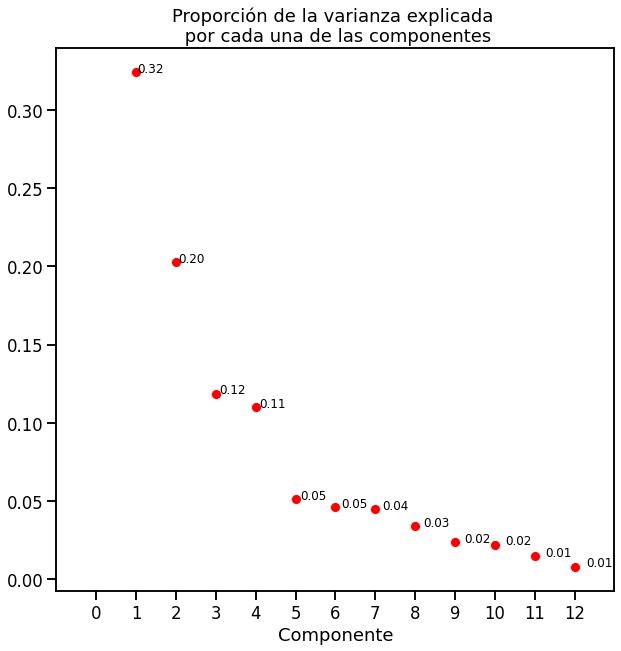

In [109]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(10,10))
x = np.arange(12)+1
sns.scatterplot(x=x, y = varianzas, s = 100, color = 'red')
plt.xlim(-1,13)
plt.xticks(np.arange(0,13))
plt.xlabel("Componente")
plt.title("Proporción de la varianza explicada \n por cada una de las componentes")
for i,varianza in enumerate(varianzas):
	plt.annotate(f'{varianza:3.2f}', (x[i],varianzas[i]), fontsize = 12,textcoords='offset points')
plt.show()

### Sumamos las primeras 3 componentes a la matriz de datos

In [110]:
scaled_mice_numeric = np.hstack((scaled_mice_numeric,proyected_features[:,:3]))

## Ejercicio 4: Composición del resultado

Transformar nuevamente el conjunto de datos procesado en un `pandas.DataFrame` y guardarlo en un archivo.

Para eso, será necesario recordar el nombre original de cada columna de la matriz, en el orden correcto. Tener en cuenta:
1. El método `OneHotEncoder.get_feature_names` o el atributo `OneHotEncoder.categories_` permiten obtener una lista con los valores de la categoría que le corresponde a cada índice de la matriz.
2. Ninguno de los métodos aplicados intercambia de lugar las columnas o las filas de la matriz.

In [ ]:
melb_df.columns

Index(['Suburb', 'Rooms', 'Type', 'Price', 'Distance', 'Postcode', 'Bathroom',
       'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea',
       'Lattitude', 'Longtitude', 'Propertycount', 'Date_Month',
       'airbnb_price_mean'],
      dtype='object')

Definimos las listas de columnas categóricas y numéricas. Quizá PostCode deberia ir categórica (se agranda mucho la matriz, pero corresponderia mas)

In [111]:
categorical_cols = ['Suburb','Type','CouncilArea','Date_Month']
numerical_cols = ['Bathroom','Car','Distance','Landsize','Lattitude','Longtitude','Postcode','Price','Propertycount','Rooms','airbnb_price_mean']

new_columns = []

In [112]:
# Step 1: encode categorical columns
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_cat = encoder.fit_transform(melb_df[categorical_cols])
for col, col_values in zip(categorical_cols, encoder.categories_):
  for col_value in col_values:
    new_columns.append('{}={}'.format(col, col_value))
print("Matrix has shape {}, with columns: {}".format(X_cat.shape, new_columns))

Matrix has shape (13535, 365), with columns: ['Suburb=Abbotsford', 'Suburb=Aberfeldie', 'Suburb=Airport West', 'Suburb=Albanvale', 'Suburb=Albert Park', 'Suburb=Albion', 'Suburb=Alphington', 'Suburb=Altona', 'Suburb=Altona Meadows', 'Suburb=Altona North', 'Suburb=Ardeer', 'Suburb=Armadale', 'Suburb=Ascot Vale', 'Suburb=Ashburton', 'Suburb=Ashwood', 'Suburb=Aspendale', 'Suburb=Aspendale Gardens', 'Suburb=Avondale Heights', 'Suburb=Bacchus Marsh', 'Suburb=Balaclava', 'Suburb=Balwyn', 'Suburb=Balwyn North', 'Suburb=Bayswater', 'Suburb=Bayswater North', 'Suburb=Beaconsfield', 'Suburb=Beaconsfield Upper', 'Suburb=Beaumaris', 'Suburb=Bellfield', 'Suburb=Bentleigh', 'Suburb=Bentleigh East', 'Suburb=Berwick', 'Suburb=Black Rock', 'Suburb=Blackburn', 'Suburb=Blackburn North', 'Suburb=Blackburn South', 'Suburb=Bonbeach', 'Suburb=Boronia', 'Suburb=Box Hill', 'Suburb=Braybrook', 'Suburb=Briar Hill', 'Suburb=Brighton', 'Suburb=Brighton East', 'Suburb=Broadmeadows', 'Suburb=Brookfield', 'Suburb=Broo

En relación a las columnas numéricas, tomamos los valores pero escalados

In [113]:
melb_df_num = melb_df[numerical_cols]

In [114]:
scaler = MinMaxScaler()
columnas = melb_df_num.columns
melb_df_num_scaled = scaler.fit_transform(melb_df_num)



In [115]:
melb_df_num = pd.DataFrame(melb_df_num_scaled,columns = columnas )

In [116]:
# Step 2: Append the numerical columns
X = np.hstack([X_cat, melb_df_num.values])
new_columns.extend(numerical_cols)
print("Matrix has shape {}, with columns: {}".format(X.shape, new_columns))

Matrix has shape (13535, 376), with columns: ['Suburb=Abbotsford', 'Suburb=Aberfeldie', 'Suburb=Airport West', 'Suburb=Albanvale', 'Suburb=Albert Park', 'Suburb=Albion', 'Suburb=Alphington', 'Suburb=Altona', 'Suburb=Altona Meadows', 'Suburb=Altona North', 'Suburb=Ardeer', 'Suburb=Armadale', 'Suburb=Ascot Vale', 'Suburb=Ashburton', 'Suburb=Ashwood', 'Suburb=Aspendale', 'Suburb=Aspendale Gardens', 'Suburb=Avondale Heights', 'Suburb=Bacchus Marsh', 'Suburb=Balaclava', 'Suburb=Balwyn', 'Suburb=Balwyn North', 'Suburb=Bayswater', 'Suburb=Bayswater North', 'Suburb=Beaconsfield', 'Suburb=Beaconsfield Upper', 'Suburb=Beaumaris', 'Suburb=Bellfield', 'Suburb=Bentleigh', 'Suburb=Bentleigh East', 'Suburb=Berwick', 'Suburb=Black Rock', 'Suburb=Blackburn', 'Suburb=Blackburn North', 'Suburb=Blackburn South', 'Suburb=Bonbeach', 'Suburb=Boronia', 'Suburb=Box Hill', 'Suburb=Braybrook', 'Suburb=Briar Hill', 'Suburb=Brighton', 'Suburb=Brighton East', 'Suburb=Broadmeadows', 'Suburb=Brookfield', 'Suburb=Broo

Agrego las imputaciones de YearBuilt y BuildingArea (estamos agregandolas con su rango original, se puede modificar para que sea escalado)

In [117]:
X_imputed = np.hstack([X,buildingArea_imp.reshape(X.shape[0],1), yearBuilt_imp.reshape(X.shape[0],1)])
new_columns.extend(['buildingArea_imp', 'yearBuilt_imp'])
print("Matrix has shape {}, with columns: {}".format(X_imputed.shape, new_columns))

Matrix has shape (13535, 378), with columns: ['Suburb=Abbotsford', 'Suburb=Aberfeldie', 'Suburb=Airport West', 'Suburb=Albanvale', 'Suburb=Albert Park', 'Suburb=Albion', 'Suburb=Alphington', 'Suburb=Altona', 'Suburb=Altona Meadows', 'Suburb=Altona North', 'Suburb=Ardeer', 'Suburb=Armadale', 'Suburb=Ascot Vale', 'Suburb=Ashburton', 'Suburb=Ashwood', 'Suburb=Aspendale', 'Suburb=Aspendale Gardens', 'Suburb=Avondale Heights', 'Suburb=Bacchus Marsh', 'Suburb=Balaclava', 'Suburb=Balwyn', 'Suburb=Balwyn North', 'Suburb=Bayswater', 'Suburb=Bayswater North', 'Suburb=Beaconsfield', 'Suburb=Beaconsfield Upper', 'Suburb=Beaumaris', 'Suburb=Bellfield', 'Suburb=Bentleigh', 'Suburb=Bentleigh East', 'Suburb=Berwick', 'Suburb=Black Rock', 'Suburb=Blackburn', 'Suburb=Blackburn North', 'Suburb=Blackburn South', 'Suburb=Bonbeach', 'Suburb=Boronia', 'Suburb=Box Hill', 'Suburb=Braybrook', 'Suburb=Briar Hill', 'Suburb=Brighton', 'Suburb=Brighton East', 'Suburb=Broadmeadows', 'Suburb=Brookfield', 'Suburb=Broo

Agrego las del PCA

In [118]:
X_pca = np.hstack([X_imputed, proyected_features[:,:3]])
new_columns.extend(['pca1', 'pca2','pca3'])
print("Matrix has shape {}, with columns: {}".format(X_pca.shape, new_columns))

Matrix has shape (13535, 381), with columns: ['Suburb=Abbotsford', 'Suburb=Aberfeldie', 'Suburb=Airport West', 'Suburb=Albanvale', 'Suburb=Albert Park', 'Suburb=Albion', 'Suburb=Alphington', 'Suburb=Altona', 'Suburb=Altona Meadows', 'Suburb=Altona North', 'Suburb=Ardeer', 'Suburb=Armadale', 'Suburb=Ascot Vale', 'Suburb=Ashburton', 'Suburb=Ashwood', 'Suburb=Aspendale', 'Suburb=Aspendale Gardens', 'Suburb=Avondale Heights', 'Suburb=Bacchus Marsh', 'Suburb=Balaclava', 'Suburb=Balwyn', 'Suburb=Balwyn North', 'Suburb=Bayswater', 'Suburb=Bayswater North', 'Suburb=Beaconsfield', 'Suburb=Beaconsfield Upper', 'Suburb=Beaumaris', 'Suburb=Bellfield', 'Suburb=Bentleigh', 'Suburb=Bentleigh East', 'Suburb=Berwick', 'Suburb=Black Rock', 'Suburb=Blackburn', 'Suburb=Blackburn North', 'Suburb=Blackburn South', 'Suburb=Bonbeach', 'Suburb=Boronia', 'Suburb=Box Hill', 'Suburb=Braybrook', 'Suburb=Briar Hill', 'Suburb=Brighton', 'Suburb=Brighton East', 'Suburb=Broadmeadows', 'Suburb=Brookfield', 'Suburb=Broo

In [119]:
X_pca.shape

(13535, 381)

In [120]:
len(new_columns)

381

In [121]:
## Re-build dataframe
processed_melb_df = pd.DataFrame(data=X_pca, columns=new_columns)
processed_melb_df.head()

,Suburb=Abbotsford,Suburb=Aberfeldie,Suburb=Airport West,Suburb=Albanvale,Suburb=Albert Park,Suburb=Albion,Suburb=Alphington,Suburb=Altona,Suburb=Altona Meadows,Suburb=Altona North,Suburb=Ardeer,Suburb=Armadale,Suburb=Ascot Vale,Suburb=Ashburton,Suburb=Ashwood,Suburb=Aspendale,Suburb=Aspendale Gardens,Suburb=Avondale Heights,Suburb=Bacchus Marsh,Suburb=Balaclava,Suburb=Balwyn,Suburb=Balwyn North,Suburb=Bayswater,Suburb=Bayswater North,Suburb=Beaconsfield,Suburb=Beaconsfield Upper,Suburb=Beaumaris,Suburb=Bellfield,Suburb=Bentleigh,Suburb=Bentleigh East,Suburb=Berwick,Suburb=Black Rock,Suburb=Blackburn,Suburb=Blackburn North,Suburb=Blackburn South,Suburb=Bonbeach,Suburb=Boronia,Suburb=Box Hill,Suburb=Braybrook,Suburb=Briar Hill,...,CouncilArea=Yarra,CouncilArea=Yarra Ranges,Date_Month=2016-01-01,Date_Month=2016-03-01,Date_Month=2016-04-01,Date_Month=2016-05-01,Date_Month=2016-06-01,Date_Month=2016-07-01,Date_Month=2016-08-01,Date_Month=2016-09-01,Date_Month=2016-10-01,Date_Month=2016-11-01,Date_Month=2016-12-01,Date_Month=2017-01-01,Date_Month=2017-02-01,Date_Month=2017-03-01,Date_Month=2017-04-01,Date_Month=2017-05-01,Date_Month=2017-06-01,Date_Month=2017-07-01,Date_Month=2017-08-01,Date_Month=2017-09-01,Date_Month=2017-11-01,Date_Month=2017-12-01,Bathroom,Car,Distance,Landsize,Lattitude,Longtitude,Postcode,Price,Propertycount,Rooms,airbnb_price_mean,buildingArea_imp,yearBuilt_imp,pca1,pca2,pca3
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.1,0.038544,0.020533,0.527872,0.517651,0.068577,0.156478,0.17616,0.111111,0.126027,128.4,1937.8,-0.126715,-0.201159,-0.050432
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.038544,0.015857,0.516431,0.513083,0.068577,0.106562,0.17616,0.111111,0.126027,79.0,1900.0,-0.118545,-0.263689,-0.016759
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.0,0.038544,0.013621,0.514501,0.513997,0.068577,0.154795,0.17616,0.222222,0.126027,150.0,1900.0,-0.143449,-0.112099,-0.111815
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.1,0.038544,0.009555,0.531594,0.516281,0.068577,0.085810,0.17616,0.222222,0.126027,110.4,1935.4,-0.142806,-0.107770,-0.107961
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.2,0.038544,0.012198,0.517396,0.513723,0.068577,0.169938,0.17616,0.333333,0.126027,142.0,2014.0,-0.153355,-0.043130,-0.124529


## Ejercicio 5: Documentación

En un documento `.pdf` o `.md` realizar un reporte de las operaciones que realizaron para obtener el conjunto de datos final. Se debe incluir:
  1. Criterios de exclusión (o inclusión) de filas
  2. Interpretación de las columnas presentes
  2. Todas las transofrmaciones realizadas

Este documento es de uso técnico exclusivamente, y su objetivo es permitir que otres desarrolladores puedan reproducir los mismos pasos y obtener el mismo resultado. Debe ser detallado pero consiso. Por ejemplo:

```
  ## Criterios de exclusión de ejemplos
  1. Se eliminan ejemplos donde el año de construcción es previo a 1900

  ## Características seleccionadas
  ### Características categóricas
  1. Type: tipo de propiedad. 3 valores posibles
  2. ...
  Todas las características categóricas fueron codificadas con un
  método OneHotEncoding utilizando como máximo sus 30 valores más 
  frecuentes.
  
  ### Características numéricas
  1. Rooms: Cantidad de habitaciones
  2. Distance: Distancia al centro de la ciudad.
  3. airbnb_mean_price: Se agrega el precio promedio diario de 
     publicaciones de la plataforma AirBnB en el mismo código 
     postal. [Link al repositorio con datos externos].

  ### Transformaciones:
  1. Todas las características numéricas fueron estandarizadas.
  2. La columna `Suburb` fue imputada utilizando el método ...
  3. Las columnas `YearBuilt` y ... fueron imputadas utilizando el 
     algoritmo ...
  4. ...

  ### Datos aumentados
  1. Se agregan las 5 primeras columnas obtenidas a través del
     método de PCA, aplicado sobre el conjunto de datos
     totalmente procesado.
```
